Bisection Method Result: x = -2.131824016571045, Iterations = 20
Golden Section Method Result: x = 4.93956281265806, Iterations = 28


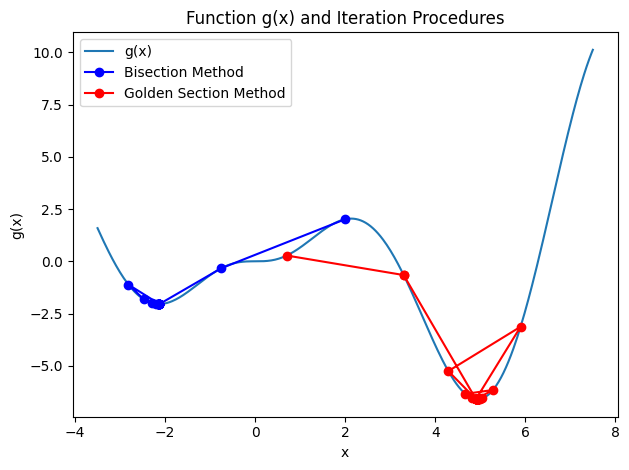

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Define the function g(x) and its derivative g_prime(x)
def g(variable):
    return variable * np.sin(variable) * np.arctan(variable)

def g_prime(f):
    return np.sin(f) * np.arctan(f) + f * np.cos(f) * np.arctan(f) + f * np.sin(f) / (1 + f ** 2)

# Bisection method
def bisection_method(a, b, tol, g_derivative):
    iterations = 0
    x_values = [a, b]
    while (b - a) / 2.0 > tol:
        c = (a + b) / 2
        x_values.append(c)
        if g_derivative(c) == 0 or (b - a) / 2.0 < tol:
            return (a + b) / 2, iterations, x_values
        elif g_derivative(a) * g_derivative(c) < 0:
            b = c
        else:
            a = c
        iterations += 1
    return (a + b) / 2, iterations, x_values

# Golden section method
def golden_section_method(a, b, tol, function):
    GR = (np.sqrt(5) - 1) / 2  # Golden ratio
    # GR_conjugate = 1 - GR
    iterations = 0
    x_values = [a, b]
    c = (1 - GR)*b + GR*a
    d = GR*b + (1 - GR)*a
    while (b - a) > tol:
        x_values.append(c)
        x_values.append(d)
        if function(c) == 0 or function(d) == 0 or (b - a)/2 < tol:
            return (a + b) / 2, iterations, x_values
        elif function(c) < function(d):
            b = d
            d = c
            c = (1 - GR) * b + GR * a
        else:
            a = c
            c = d
            d = GR * b + (1 - GR) * a
        iterations += 1
    return (a + b) / 2, iterations, x_values

# Define the interval and tolerance
interval = (-3.5, 7.5)
tolerance = 1e-5

# Apply the bisection method
bisection_result, bisection_iterations, bisection_x_values = bisection_method(interval[0], interval[1], tolerance, g_prime)
print(f"Bisection Method Result: x = {bisection_result}, Iterations = {bisection_iterations}")

# Apply the golden section method
golden_section_result, golden_section_iterations, golden_section_x_values = golden_section_method(interval[0], interval[1], tolerance, g)
print(f"Golden Section Method Result: x = {golden_section_result}, Iterations = {golden_section_iterations}")

# Vectorize g_prime to apply it element-wise
g_prime_vectorized = np.vectorize(g_prime)

# Plot g(x) and the iteration procedures 
# (both from the third iteration for better visualization)
x = np.linspace(interval[0], interval[1], 400)
plt.plot(x, g(x), label='g(x)')
plt.plot(bisection_x_values[2:], g(bisection_x_values)[2:], 'bo-', label='Bisection Method')
plt.plot(golden_section_x_values[2:], g(golden_section_x_values)[2:], 'ro-', label='Golden Section Method')
plt.title('Function g(x) and Iteration Procedures')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.legend()

plt.tight_layout()
plt.show()